### Furniture Sales Forecast

Every business owner’s objective is to estimate the future trends – in terms of sales, profits, gains etc.To do this analysis, the owner first has to segregate the data by category and analyze each entity 
separately. For each entity, a forecast can be estimated based on the past sales of that entity. The idea 
behind this is to find out the popularity of a certain product and how its sales can impact the business.

Every product category is unique and cater to different customer base. So the analysis cannot be 
generalized that one trend is applicable to all products. A thorough insight into the past performance will reveal a lot of components that will enable the business to identify the trends.

### Business Objective
Build a forecast model to predict the furniture sales 
of a certain store


##### Importing libraries

In [333]:
# pandas and numpy
import pandas as pd 
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sb

# warnings
import warnings
warnings.filterwarnings('ignore')

# Preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder                 # converting categorical to numerical
from sklearn.preprocessing import MinMaxScaler, StandardScaler # to normalize and standadize the data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #finding p and q values,correlogram

# Smoothing and Model
from statsmodels.tsa.api import SimpleExpSmoothing # exponential smoothening
from statsmodels.tsa.api import ExponentialSmoothing # double exponential smoothing
from statsmodels.tsa.arima.model import ARIMA # building ARMA and ARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX # Sraimax model

# Decompose and checking for stationarity
from statsmodels.tsa.seasonal import seasonal_decompose # different components of the Time series data
from statsmodels.tsa.stattools import adfuller # to check for the stationarity of the data
import statsmodels.api as sm # white noise

# Metrics
import statsmodels.api as sm # white noise
from sklearn.metrics import mean_absolute_error,mean_squared_error # metrics

#Getting good values
from pmdarima.arima import auto_arima 


##### Reading the data

In [2]:
df = pd.read_excel('DS3_C6_S4_TimeSeries_Sales_Data_Project.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


##### Dtypes

In [3]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [4]:
df.shape

(9994, 21)

##### Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

##### Describe

In [6]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


##### Null values

In [7]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

There are no null values in the data.

##### Numerical columns

In [8]:
a =  df.select_dtypes(exclude='object')  
a.head()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
0,1,2016-11-08,2016-11-11,42420,261.9600,2,0.00,41.9136
1,2,2016-11-08,2016-11-11,42420,731.9400,3,0.00,219.5820
2,3,2016-06-12,2016-06-16,90036,14.6200,2,0.00,6.8714
3,4,2015-10-11,2015-10-18,33311,957.5775,5,0.45,-383.0310
4,5,2015-10-11,2015-10-18,33311,22.3680,2,0.20,2.5164


##### categorical columns

In [9]:
b =  df.select_dtypes(include='object')  
b.head()

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
0,CA-2016-152156,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase
1,CA-2016-152156,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,..."
2,CA-2016-138688,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...
3,US-2015-108966,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table
4,US-2015-108966,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System


### EDA

In [36]:
sb.set(style="whitegrid")

In [21]:
a.columns

Index(['Row ID', 'Order Date', 'Ship Date', 'Postal Code', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

**Distribution for numerical columns**

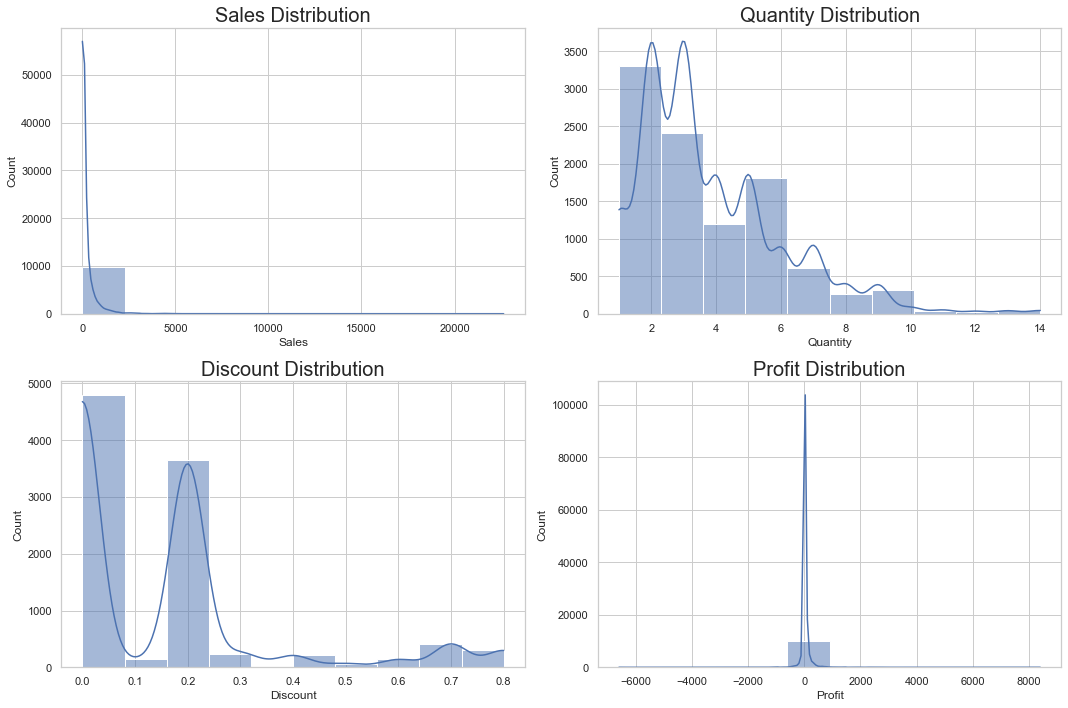

In [37]:
fig,ax = plt.subplots(figsize = (15,10))
z=1
column=['Sales', 'Quantity','Discount', 'Profit']
for col in column:
    plt.subplot(2,2,z)
    sb.histplot(x = a[col],kde=True,bins=10)
    plt.title(f'{col} Distribution',fontsize=20)
    z=z+1

plt.tight_layout()
plt.show()

##### Interprettation :
* Sales ,Quantity and Discount are having right skewed data.
* There are be outliers in the data.
* In Profit we can see that the datas having negative values also ,ie) There can be profit and loss in the profit column.

**Boxplot of numerical columns**

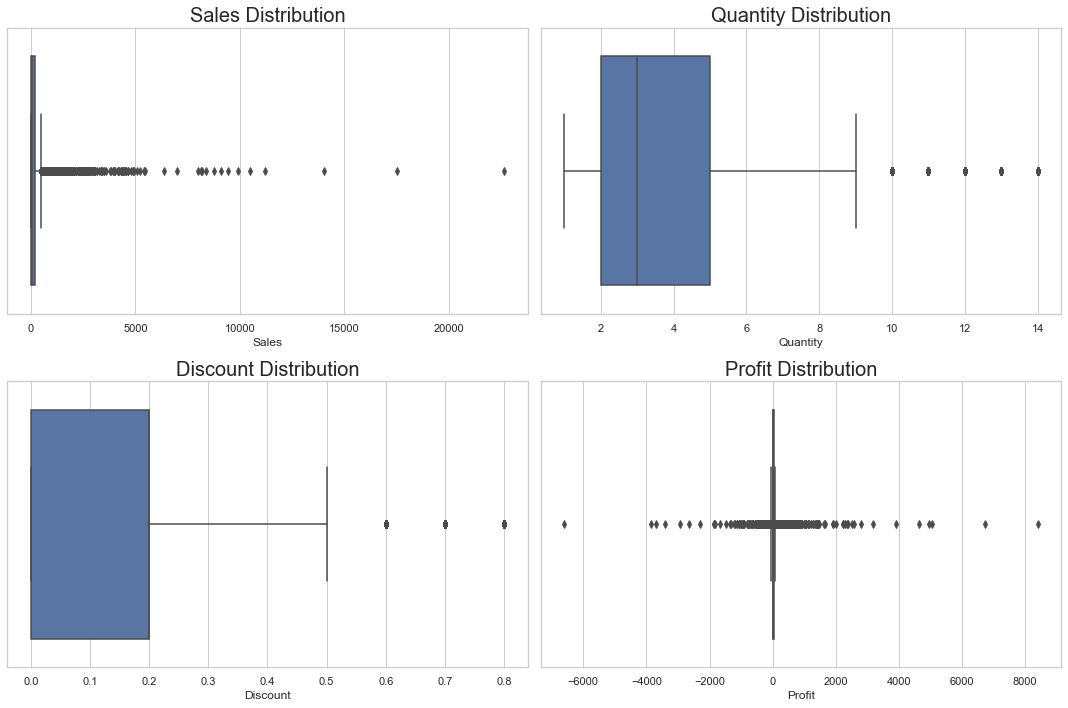

In [38]:
fig,ax = plt.subplots(figsize = (15,10))
z=1
column=['Sales', 'Quantity','Discount', 'Profit']
for col in column:
    plt.subplot(2,2,z)
    sb.boxplot(x = a[col])
    plt.title(f'{col} Distribution',fontsize=20)
    z=z+1

plt.tight_layout()
plt.show()

##### Interpretation :
* From the boxplot we can able to see that 'Sales', 'Quantity','Discount', 'Profit' are having outliers in the data.
* Most of the datas are right skewed.

**Sales**

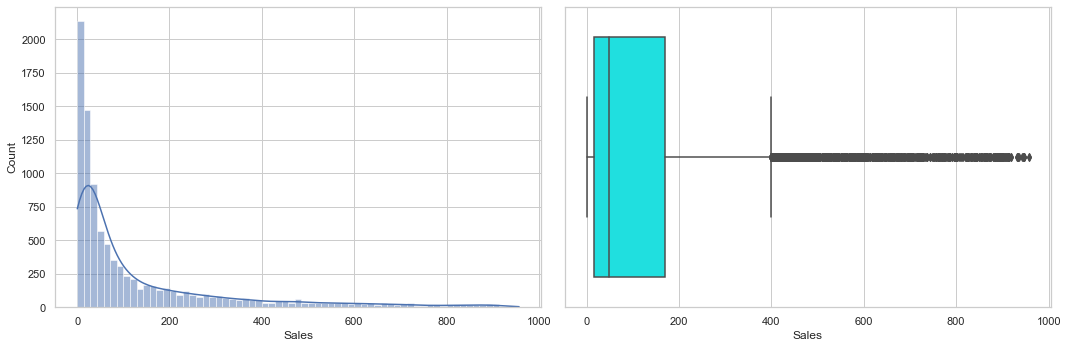

In [39]:
sales = a[a['Sales'] < a['Sales'].quantile(0.95)] # getting the datas below 95%
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
sb.histplot(x=sales['Sales'],ax=ax[0],kde=True)
sb.boxplot(x=sales['Sales'],color='cyan')
plt.tight_layout()

##### Interpretation :
* There are more outliers in the data ie) The sales can be high at some period of time.

In [41]:
b.columns

Index(['Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment',
       'Country', 'City', 'State', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name'],
      dtype='object')

**Counts of categorical columns**

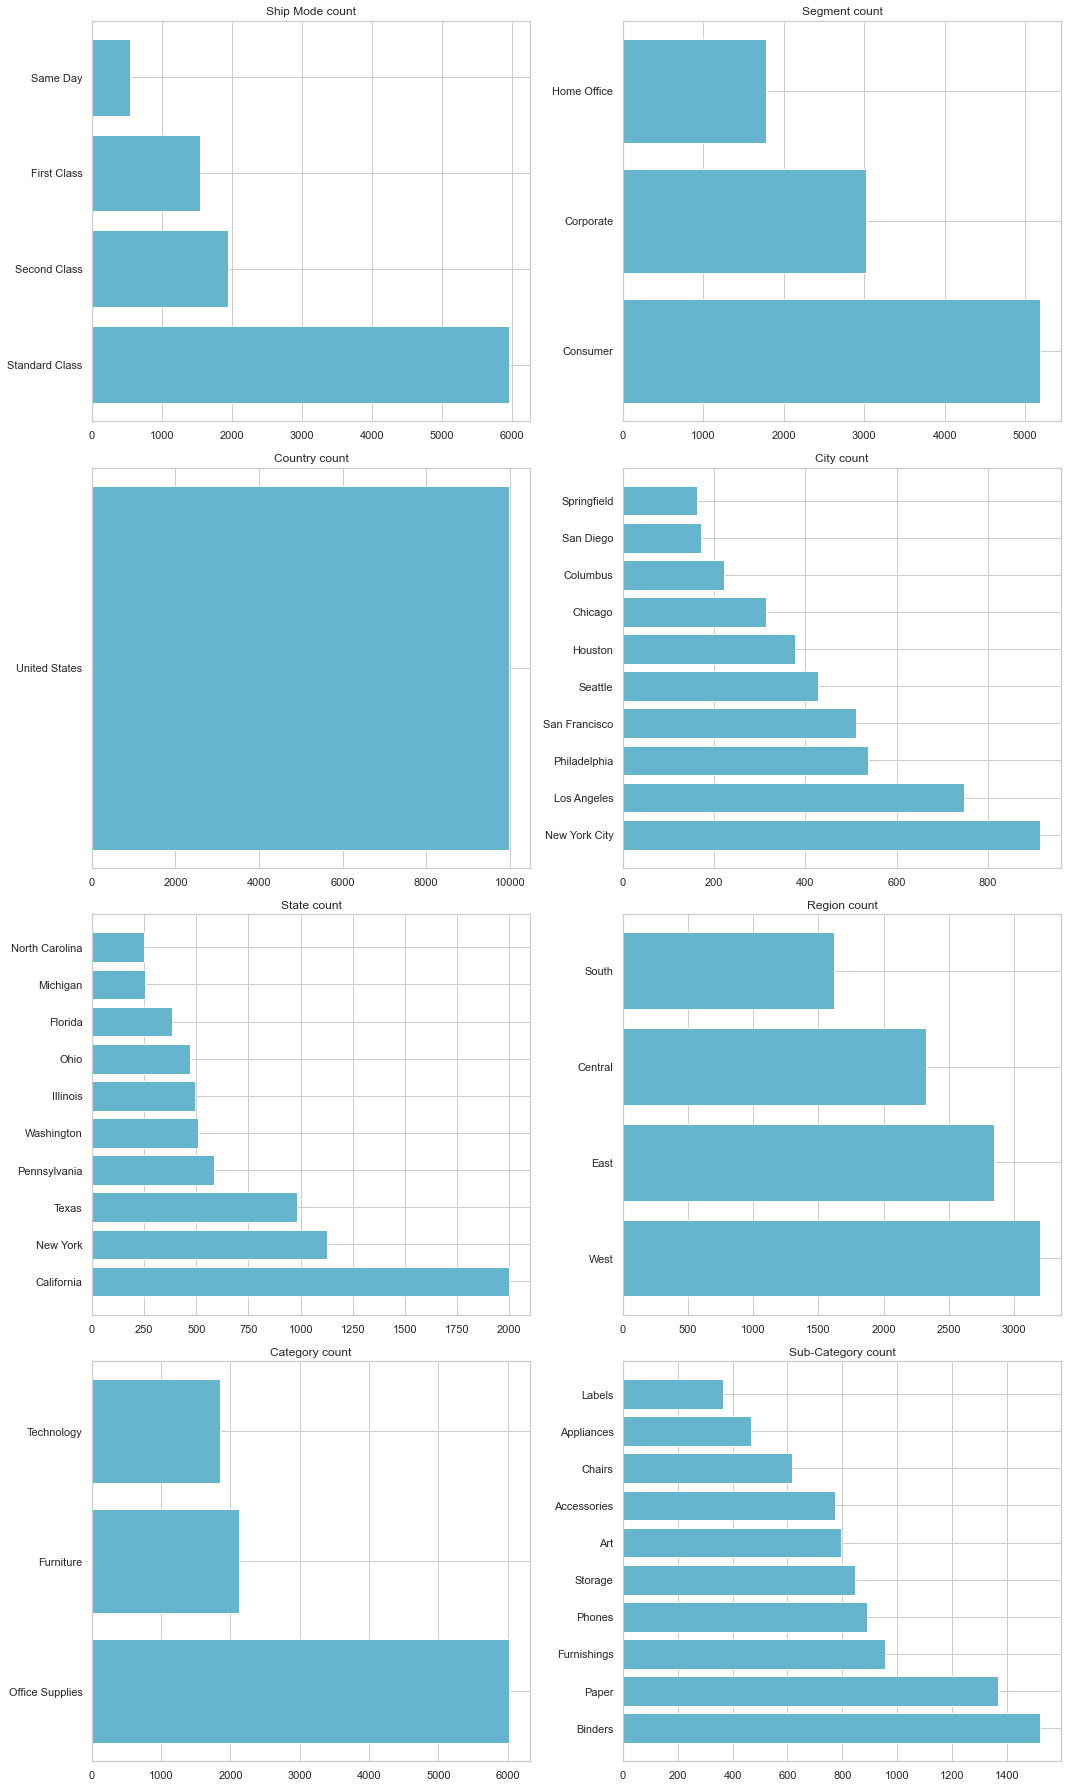

In [72]:
fig,ax = plt.subplots(figsize = (15,25))
z=1
b_column = ['Ship Mode',  'Segment','Country', 'City', 'State', 'Region', 'Category','Sub-Category']
for col in b_column:
    plt.subplot(4,2,z)
    data=b[col].value_counts().sort_values(ascending=False)[:10]
    plt.barh(data.index,data.values,color='c')
    plt.title(f'{col} count')
    z=z+1

plt.tight_layout()
plt.show()

##### Interpretation :
* More number of second classes in the ship mode.
* More number of consumer in the segment.
* More number of new york city counts in the given data.
* More number of office and binders are in the given data.
* All the datas from the United States.

**Percentages of categorical columns**

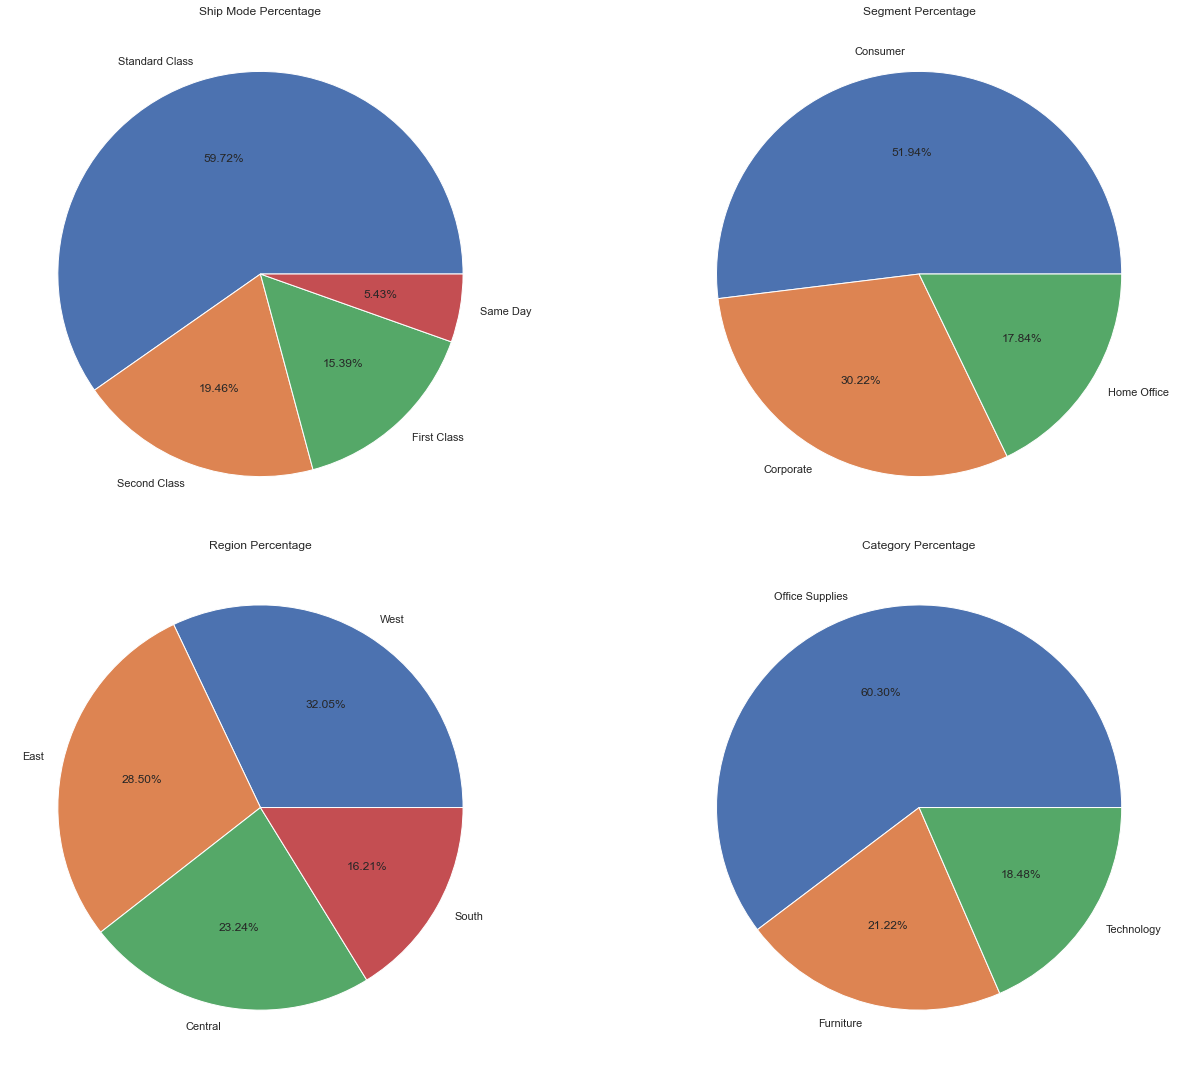

In [54]:
fig,ax = plt.subplots(figsize = (20,15))
b_column = [ 'Ship Mode', 'Segment', 'Region', 'Category']
z = 1

for col in b_column:
    plt.subplot(2,2,z)
    data = b[col].value_counts()
    plt.pie(data,labels=data.index,autopct='%.2f%%')
    plt.title(f'{col} Percentage')
    z =z + 1

plt.tight_layout()
plt.show()

##### Interpretation :
* Standard class,cousumer,West,Office supplies are in more percentages in their respective category( 'Ship Mode', 'Segment', 'Region', 'Category']).
* The second highest are aecond class,corporate,east,furniture in their respective category.

**Sales vs Categorical columns**

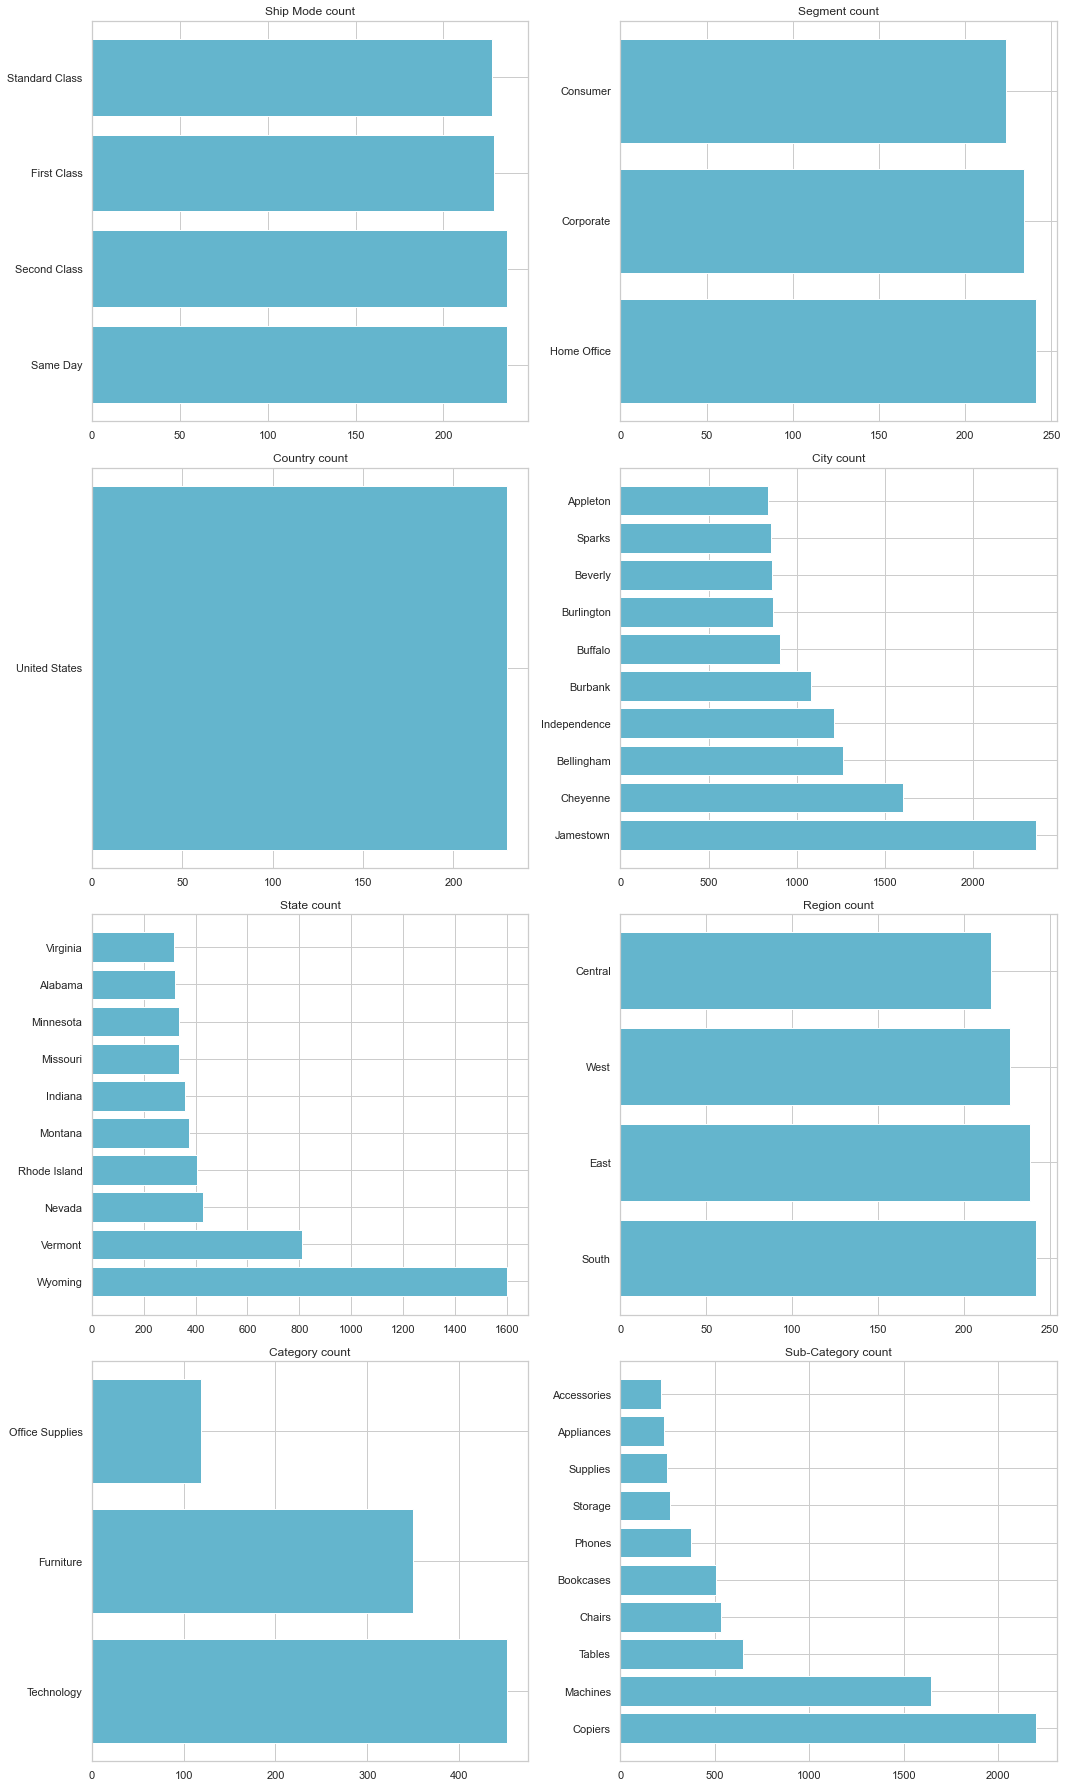

In [79]:
fig,ax = plt.subplots(figsize = (15,25))
z=1
b_column = ['Ship Mode',  'Segment','Country', 'City', 'State', 'Region', 'Category','Sub-Category']
for col in b_column:
    plt.subplot(4,2,z)
    data=df.groupby(by=[col])['Sales'].mean()
    data_sort = data.sort_values(ascending=False)
    data_top = data_sort.head(10)
    plt.barh(data_top.index,data_top.values,color='c')
    plt.title(f'{col} count')
    z=z+1

plt.tight_layout()
plt.show()

##### Interpretation :
* Same day,second class has the highest sales in the shipment mode.
* Home applience has the his sales.
* Jamestown has the highest average sales than any other city.
* Wyoming state has the highest average sales.
* Copiers and mavhines has the highest average sales.
* In category Technology has the highest average sales.

#### Correlation :

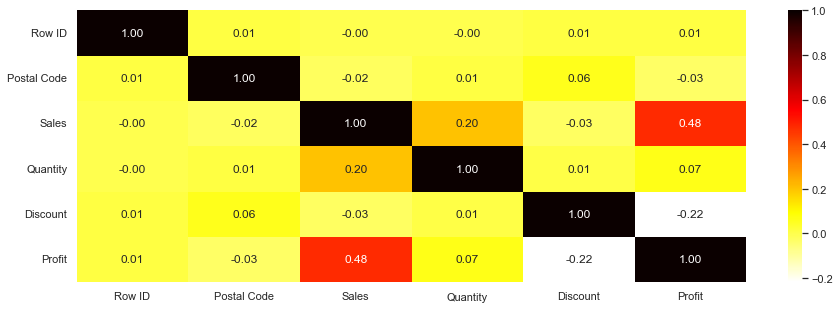

In [80]:
corr=df.corr()
plt.figure(figsize=(15,5))
sb.heatmap(corr,annot=True,fmt='.2f',cmap='hot_r')
plt.show()

##### Interpretation :
* From the heatmap we can see that profit ,quantity has some correlation with each other.
* Discount and profit has weak negative correlation.
* Except these all are having very weak correlation with each other.

##### Pair plot

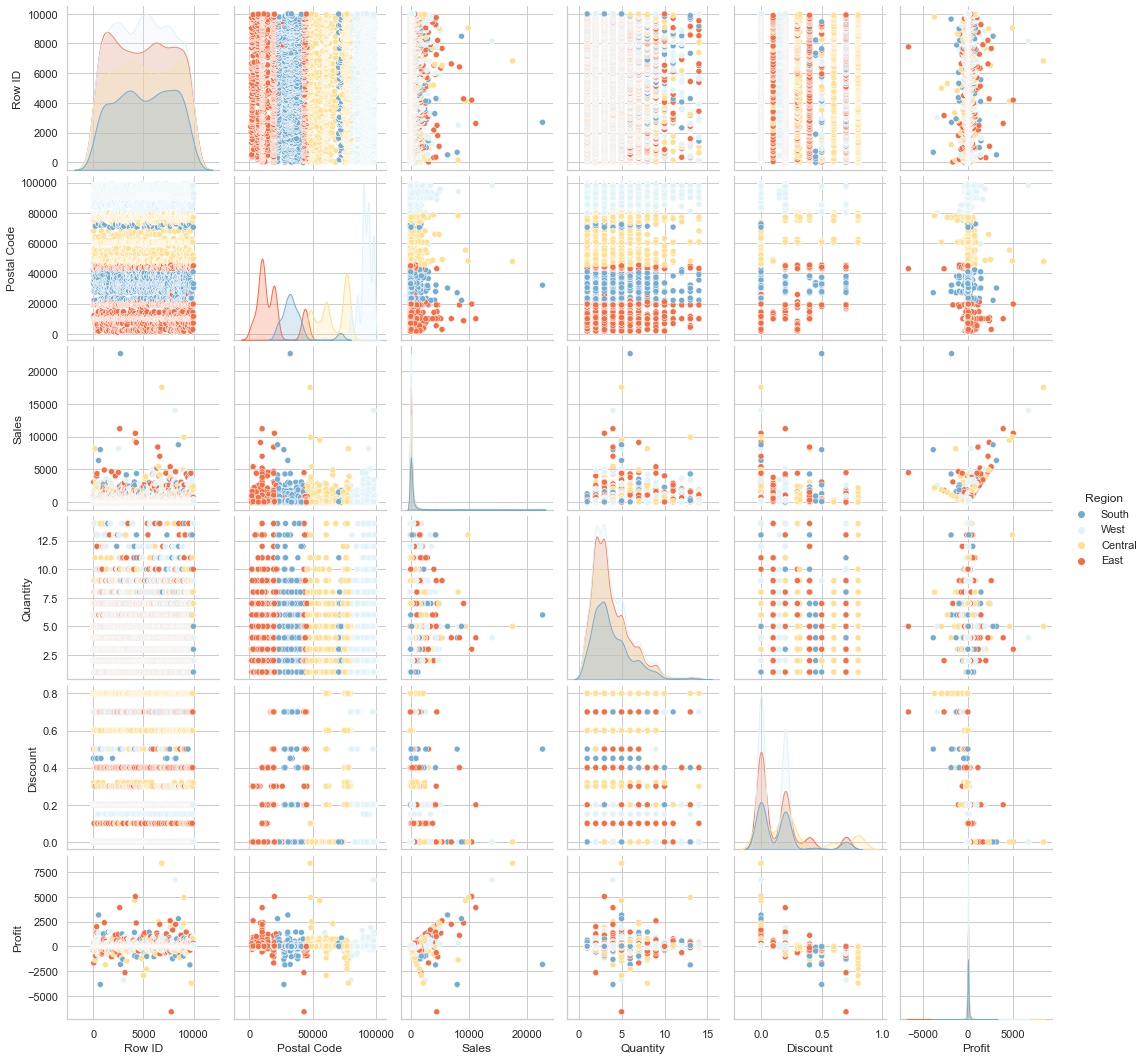

In [82]:
sb.pairplot(df,hue='Region',palette='RdYlBu_r')
plt.show()

Regions doesn't affect the sales.

**Data Preprocessing**

In [83]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


**Taking the datas of Furniture form the category**

In [10]:
data = df.copy()

In [11]:
data = data.loc[data['Category'] == 'Furniture']

**Sorting**

In [12]:
data=data.sort_values('Order Date')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7474,7475,CA-2014-167199,2014-01-06,2014-01-10,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,...,42420,South,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,2573.820,9,0.0,746.4078
7660,7661,CA-2014-105417,2014-01-07,2014-01-12,Standard Class,VS-21820,Vivek Sundaresam,Consumer,United States,Huntsville,...,77340,Central,FUR-FU-10004864,Furniture,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",76.728,3,0.6,-53.7096
866,867,CA-2014-149020,2014-01-10,2014-01-15,Standard Class,AJ-10780,Anthony Jacobs,Corporate,United States,Springfield,...,22153,South,FUR-FU-10000965,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Ridgewood Wall ...",51.940,1,0.0,21.2954
716,717,CA-2014-130092,2014-01-11,2014-01-14,First Class,SV-20365,Seth Vernon,Consumer,United States,Dover,...,19901,East,FUR-FU-10000010,Furniture,Furnishings,"DAX Value U-Channel Document Frames, Easel Back",9.940,2,0.0,3.0814
2978,2979,CA-2014-109232,2014-01-13,2014-01-16,Second Class,ND-18370,Natalie DeCherney,Consumer,United States,Mount Pleasant,...,29464,South,FUR-CH-10000422,Furniture,Chairs,Global Highback Leather Tilter in Burgundy,545.940,6,0.0,87.3504


**Groupby to remove duplicates**

In [13]:
# Group by using orderdate
sales=data.groupby(["Order Date"])["Sales"].sum()
sales

Order Date
2014-01-06    2573.8200
2014-01-07      76.7280
2014-01-10      51.9400
2014-01-11       9.9400
2014-01-13     879.9390
                ...    
2017-12-24    1393.4940
2017-12-25     832.4540
2017-12-28     551.2568
2017-12-29    2330.7180
2017-12-30     323.1360
Name: Sales, Length: 889, dtype: float64

**Setting the index**

In [14]:
# setting the index
data=data.set_index('Order Date')
data.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2014-01-06,7475,CA-2014-167199,2014-01-10,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,Kentucky,42420,South,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,2573.820,9,0.0,746.4078
2014-01-07,7661,CA-2014-105417,2014-01-12,Standard Class,VS-21820,Vivek Sundaresam,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10004864,Furniture,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",76.728,3,0.6,-53.7096
2014-01-10,867,CA-2014-149020,2014-01-15,Standard Class,AJ-10780,Anthony Jacobs,Corporate,United States,Springfield,Virginia,22153,South,FUR-FU-10000965,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Ridgewood Wall ...",51.940,1,0.0,21.2954
2014-01-11,717,CA-2014-130092,2014-01-14,First Class,SV-20365,Seth Vernon,Consumer,United States,Dover,Delaware,19901,East,FUR-FU-10000010,Furniture,Furnishings,"DAX Value U-Channel Document Frames, Easel Back",9.940,2,0.0,3.0814
2014-01-13,2979,CA-2014-109232,2014-01-16,Second Class,ND-18370,Natalie DeCherney,Consumer,United States,Mount Pleasant,South Carolina,29464,South,FUR-CH-10000422,Furniture,Chairs,Global Highback Leather Tilter in Burgundy,545.940,6,0.0,87.3504


In [15]:
data.tail()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2017-12-29,7637,US-2017-158526,2018-01-01,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Louisville,Kentucky,40214,South,FUR-CH-10001270,Furniture,Chairs,Harbour Creations Steel Folding Chair,258.750,3,0.0,77.6250
2017-12-29,7633,US-2017-158526,2018-01-01,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Louisville,Kentucky,40214,South,FUR-CH-10002602,Furniture,Chairs,DMI Arturo Collection Mission-style Design Woo...,1207.840,8,0.0,314.0384
2017-12-29,5132,CA-2017-146626,2018-01-05,Standard Class,BP-11185,Ben Peterman,Corporate,United States,Anaheim,California,92804,West,FUR-FU-10002501,Furniture,Furnishings,Nu-Dell Executive Frame,101.120,8,0.0,37.4144
2017-12-29,7636,US-2017-158526,2018-01-01,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Louisville,Kentucky,40214,South,FUR-CH-10004495,Furniture,Chairs,"Global Leather and Oak Executive Chair, Black",300.980,1,0.0,87.2842
2017-12-30,907,CA-2017-143259,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009,East,FUR-BO-10003441,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",323.136,4,0.2,12.1176


**Reshaping the data week wise**

In [16]:
# plotinng for weekly
resample=data.resample('w')
we_mean=resample.mean()

In [17]:
we_mean.head()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Order Date,,,,,,
2014-01-12,4180.000000,40453.500000,678.107000,3.750000,0.150000,179.268750
2014-01-19,4166.000000,49420.200000,250.094600,4.800000,0.310000,-50.800880
2014-01-26,4883.777778,51856.666667,183.995333,2.888889,0.022222,39.514033
2014-02-02,3581.000000,92364.000000,311.833000,2.500000,0.175000,-6.615200
2014-02-09,9267.000000,89031.000000,14.560000,2.000000,0.000000,5.532800


**Visualizing the datas**

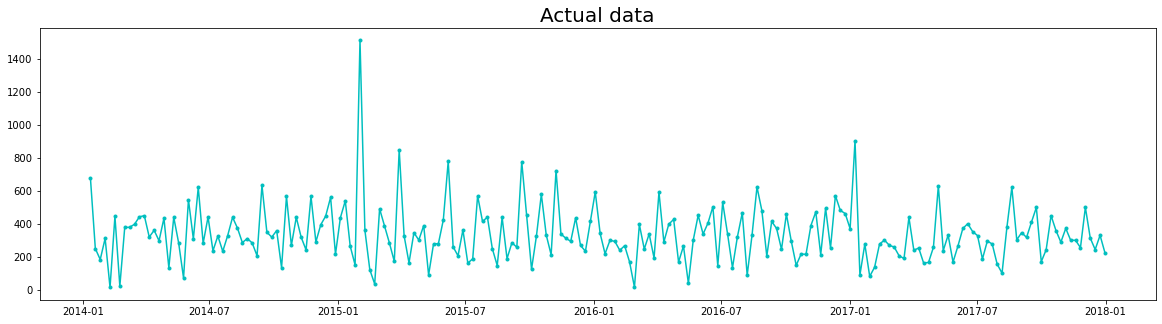

In [335]:
fig,ax = plt.subplots(figsize = (20,5))
plt.plot(we_mean.Sales,marker = '.',c = 'c')
plt.title('Actual data',fontsize=20)
plt.show()

We cant interpret much from the whole data so we are decomposing it and checking for seasonality and trend.

**Decomposing**

In [19]:
decomp = seasonal_decompose(we_mean.Sales,period=52)

In [20]:
# trend,seasonal,error
d_trend=decomp.trend # for checking trend 
d_seasonal=decomp.seasonal # for seasonality
d_residual=decomp.resid # for checking irregularity

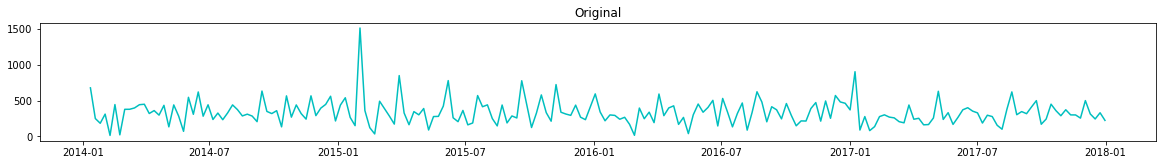

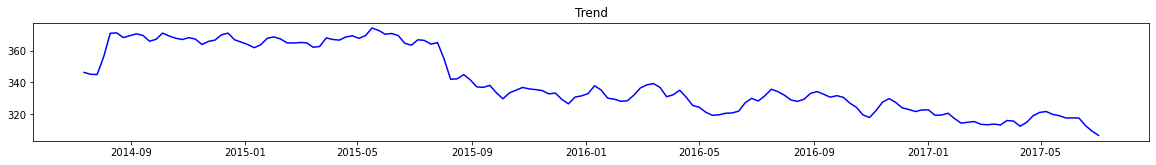

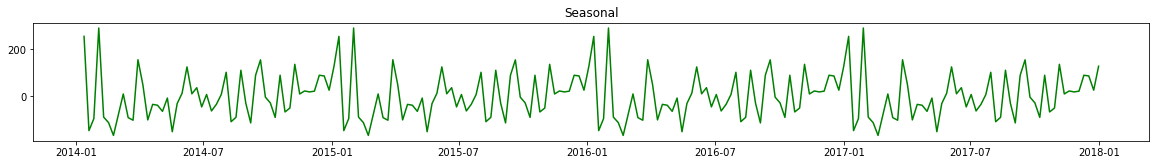

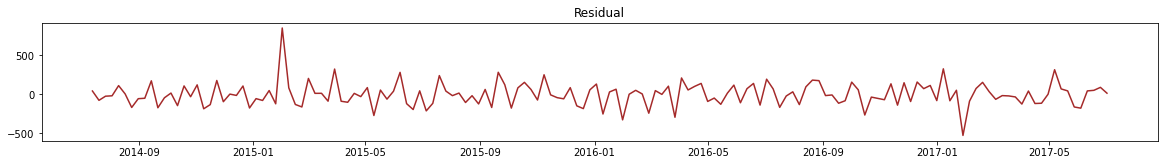

In [21]:
# plot all the 4 components(original data,decomp)


plt.figure(figsize=(20,10))
plt.subplot(4,1,1)
plt.plot(we_mean.Sales,color='c')
plt.title('Original')
plt.show()

plt.figure(figsize=(20,10))
plt.subplot(4,1,2)
plt.plot(d_trend,color='b')
plt.title('Trend')
plt.show()

plt.figure(figsize=(20,10))
plt.subplot(4,1,3)
plt.plot(d_seasonal,color='g')
plt.title('Seasonal')
plt.show()

plt.figure(figsize=(20,10))
plt.subplot(4,1,4)
plt.plot(d_residual,color='brown')
plt.title('Residual')
plt.show()

##### Interpretation :
* From the trend graph we can see some downward trend and the trend is additive.
* From the seasonal plot we can able to see some high peaks at a period over every year and some density at each time.Therefore this data also has seasonality 
* From the Residual plot we can see that error are in straight line ie) This data can be stationary.
* This data has both trend and seasonality.

**Checking Stationarity**

In [22]:
##### Stationary
def checkStationarity(data):
    pvalue=adfuller(data)[1]
    if pvalue < 0.05:
        ret="Data is stationary proceed with model building"
    else:
        ret="Data is not stationary.Make it stationary"
    return ret

In [23]:
checkStationarity(we_mean.Sales)

'Data is stationary proceed with model building'

**Triple exponential smoothing technique**

Since this data has Trend and seasonality.

Finding the best alpha,beta,gamma vales by using error values.

Defining user defined function.

In [27]:
def triple_exponential(data):
    alpha = [0.1,0.2,0.4,0.6,0.8]
    beta = [0.1,0.25,0.45,0.65,0.85]
    gamma = [0.1,0.25,0.45,0.65,0.85]
    aic_li = []
    bic_li = []
    MSE_li = []
    RMSE_li = []
    alpha_1=[]
    beta_1=[]
    gamma_1=[]
    
    for i in alpha:
        for j in beta:
            for k in gamma:
                exponential_model = ExponentialSmoothing(data,trend ='add',seasonal='add',seasonal_periods=4).fit(smoothing_level=i,
                                                                                                smoothing_trend=j,
                                                                                                smoothing_seasonal=k)                
                
                
                
                
                
                aic_li.append(exponential_model.aic)
                bic_li.append(exponential_model.bic)
                forecast = exponential_model.fittedvalues
                mse = mean_squared_error(data, forecast) 
                rmse= mean_squared_error(data, forecast,squared= False)
                MSE_li.append(mse)
                RMSE_li.append(rmse)
                alpha_1.append(i)
                beta_1.append(j)
                gamma_1.append(k)
                
    comparision = pd.DataFrame({'alpha':alpha_1,'Beta':beta_1,'Gamma':gamma_1,
                      'MSE':MSE_li,'RMSE':RMSE_li})
    
    return(comparision)                

In [28]:
triple_best=triple_exp(we_mean.Sales)
triple_best.sort_values(by='RMSE',ascending=True)[:10]

,alpha,Beta,Gamma,MSE,RMSE
0,0.1,0.10,0.10,33488.600489,182.998908
5,0.1,0.25,0.10,35007.950949,187.104118
1,0.1,0.10,0.25,36276.362734,190.463547
25,0.2,0.10,0.10,36325.276916,190.591912
10,0.1,0.45,0.10,36962.918864,192.257429
6,0.1,0.25,0.25,37787.806007,194.390859
30,0.2,0.25,0.10,38635.172641,196.558319
15,0.1,0.65,0.10,39379.050930,198.441555
26,0.2,0.10,0.25,39528.813226,198.818543
11,0.1,0.45,0.25,39876.691446,199.691491


##### Interpretation :
At alpha=0.1,beta=0.1,gamma=0.1 we are getting low error values by checking for the visualization also

In [29]:
# different values
alphas = [0.0,0.2,0.4,0.6,0.8]
betas = [0.0,0.25,0.45,0.65,0.85]
gammas = [0.0,0.25,0.45,0.65,0.85]
d_triple_exp = {}
models_3=[]

In [30]:
def Triplesmoothing(temp,alpha,beta,gamma):
    model_tep = ExponentialSmoothing(temp,trend='add',seasonal='add',seasonal_periods=4).fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma)
    fcast_tep = model_tep.fittedvalues
    df_3 = pd.DataFrame({'actual':temp, 'forecast':fcast_tep})
    return(model_tep,df_3)

In [31]:
for a,b,c in zip(alphas,betas,gammas):
    model_tep, df_3 = Triplesmoothing(we_mean.Sales,a,b,c)
    d_triple_exp[a] = df_3.forecast
    models_3.append(model_tep)

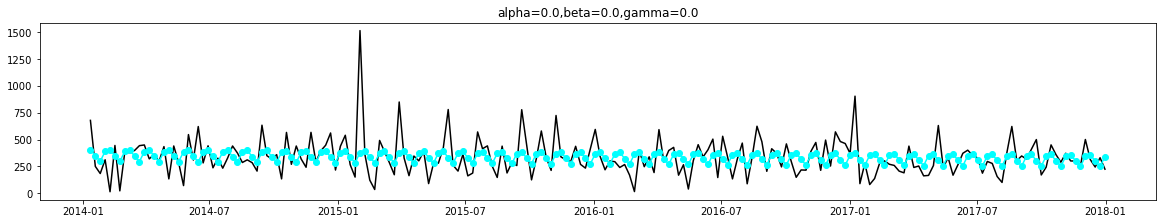

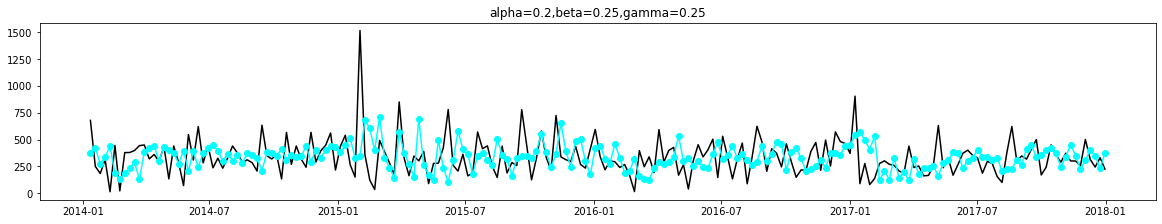

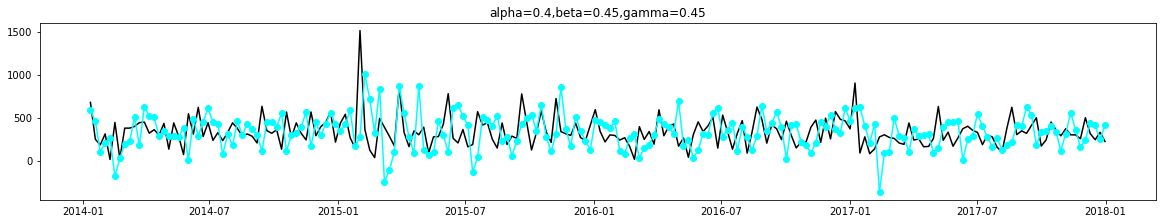

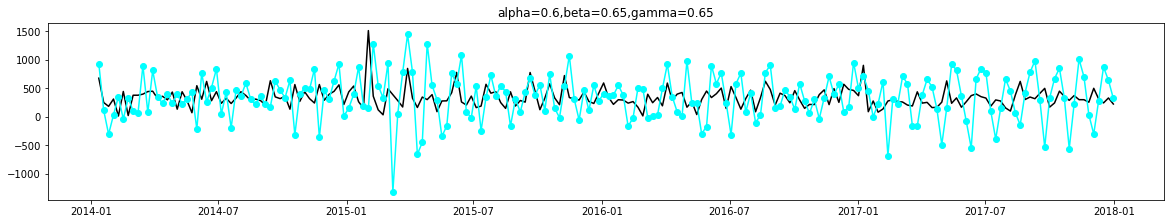

In [32]:
plt.figure(figsize=(20,15))
plt.subplot(4,1,1)
plt.plot(we_mean.Sales[:365],color='black')
plt.plot(d_triple_exp.get(0.0)[:365],label='alpha=0.0',marker='o',color='cyan')
plt.title('alpha=0.0,beta=0.0,gamma=0.0')
plt.show()

plt.figure(figsize=(20,15))
plt.subplot(4,1,2)
plt.plot(we_mean.Sales[:365],color='black')
plt.plot(d_triple_exp.get(0.2)[:365],label='alpha=0.2',marker='o',color='cyan')
plt.title('alpha=0.2,beta=0.25,gamma=0.25')
plt.show()

plt.figure(figsize=(20,15))
plt.subplot(4,1,3)
plt.plot(we_mean.Sales[:365],color='black')
plt.plot(d_triple_exp.get(0.4)[:365],label='alpha=0.4',marker='o',color='cyan')
plt.title('alpha=0.4,beta=0.45,gamma=0.45')
plt.show()

plt.figure(figsize=(20,15))
plt.subplot(4,1,4)
plt.plot(we_mean.Sales[:365],color='black')
plt.plot(d_triple_exp.get(0.6)[:365],label='alpha=0.6',marker='o',color='cyan')
plt.title('alpha=0.6,beta=0.65,gamma=0.65')
plt.show()

##### Interpretation :

* At alpha=0.4,beta=0.45,gamma=0.45 and alpha=0.6,beta=0.65,gamma=0.65 the datas having more peak values than comapared to normal data.
* At alpha=0.2,beta=0.25,gamma=0.25 and alpha=0.1,beta=0.1,gamma=0.1 we are getting good smoothened data.
* So we can choose these values.

##### Splitting the data

In [33]:
we_sales=we_mean.Sales

In [34]:
# splitting the data by row index
row = int(0.8 * len(we_sales))

train = we_sales.iloc[:row]
test = we_sales.iloc[row:]
print(f"Train = {len(train)}, Test = {len(test)}")

Train = 166, Test = 42


**Triple Exponential Smoothing using best values**

Using alpha=0.1,beta=0.1,gamma=0.1 values.

In [337]:
model_tep=ExponentialSmoothing(train,trend='additive',seasonal='add',seasonal_periods=52).fit(smoothing_level=0.1,smoothing_trend=0.1,smoothing_seasonal=0.1)
fcast_tep = model_tep.fittedvalues

In [338]:
fcast_tep

Order Date
2014-01-12    604.446987
2014-01-19    206.230705
2014-01-26    232.804398
2014-02-02    559.024391
2014-02-09    169.787982
                 ...    
2017-02-12    244.193684
2017-02-19     82.862578
2017-02-26    277.630369
2017-03-05    353.704914
2017-03-12    268.431416
Freq: W-SUN, Length: 166, dtype: float64

In [339]:
forecast_tep = model_tep.forecast(len(test))
forecast_tep

2017-03-19    280.865675
2017-03-26    456.139332
2017-04-02    373.564589
2017-04-09    225.872233
2017-04-16    299.281192
2017-04-23    335.779784
2017-04-30    175.497668
2017-05-07    207.026636
2017-05-14    140.229576
2017-05-21    157.846367
2017-05-28    408.413548
2017-06-04    407.322141
2017-06-11    357.978335
2017-06-18    260.044215
2017-06-25    240.087786
2017-07-02    234.067969
2017-07-09    202.766389
2017-07-16    227.418419
2017-07-23    268.076356
2017-07-30    360.212212
2017-08-06    144.866216
2017-08-13    164.072935
2017-08-20    363.061583
2017-08-27    217.786065
2017-09-03    127.399966
2017-09-10    327.758732
2017-09-17    390.958591
2017-09-24    227.987829
2017-10-01    202.445707
2017-10-08    135.894189
2017-10-15    310.412039
2017-10-22    154.008732
2017-10-29    168.149489
2017-11-05    355.605444
2017-11-12    227.094106
2017-11-19    235.155009
2017-11-26    232.304276
2017-12-03    229.110002
2017-12-10    296.086379
2017-12-17    288.736099


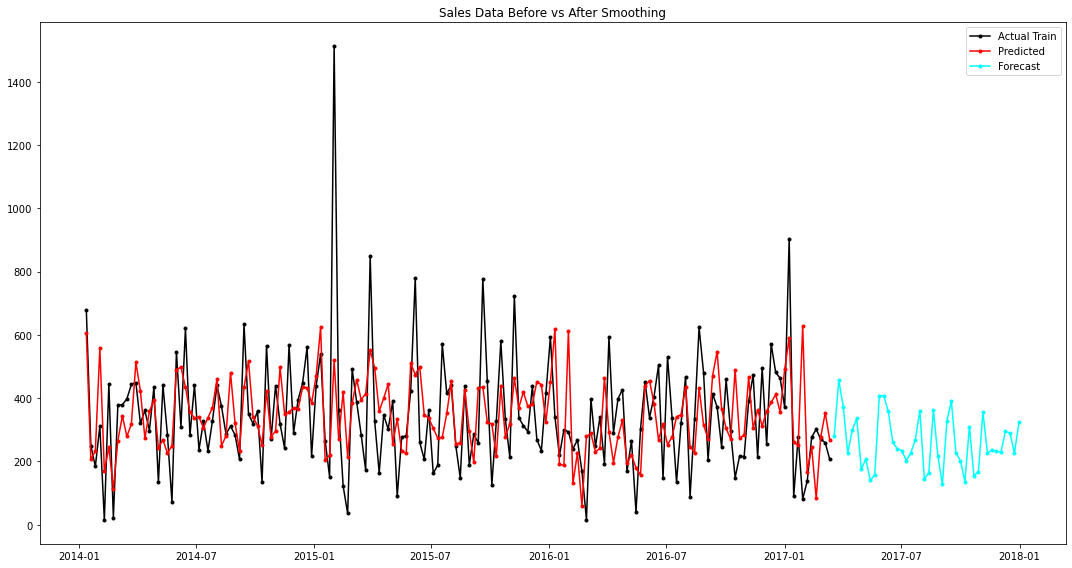

In [341]:
fig,ax = plt.subplots(figsize = (15,8))

plt.subplot(111)
plt.plot(train,marker = '.',c = 'black',label='Actual Train')
plt.plot(fcast_tep,marker = '.',c = 'red',label='Predicted')
plt.plot(forecast_tep,marker = '.',c = 'cyan',label='Forecast')
plt.title('Sales Data Before vs After Smoothing')
plt.legend()


plt.tight_layout()
plt.show()

##### Interpretation :
* From this graph we can see that data is smoothened well and the high peaks are removed.
* And we are forecasted by using triple exponential smoothing.
* Predicted values are also looking good.

##### ACF and PCF for p and q values

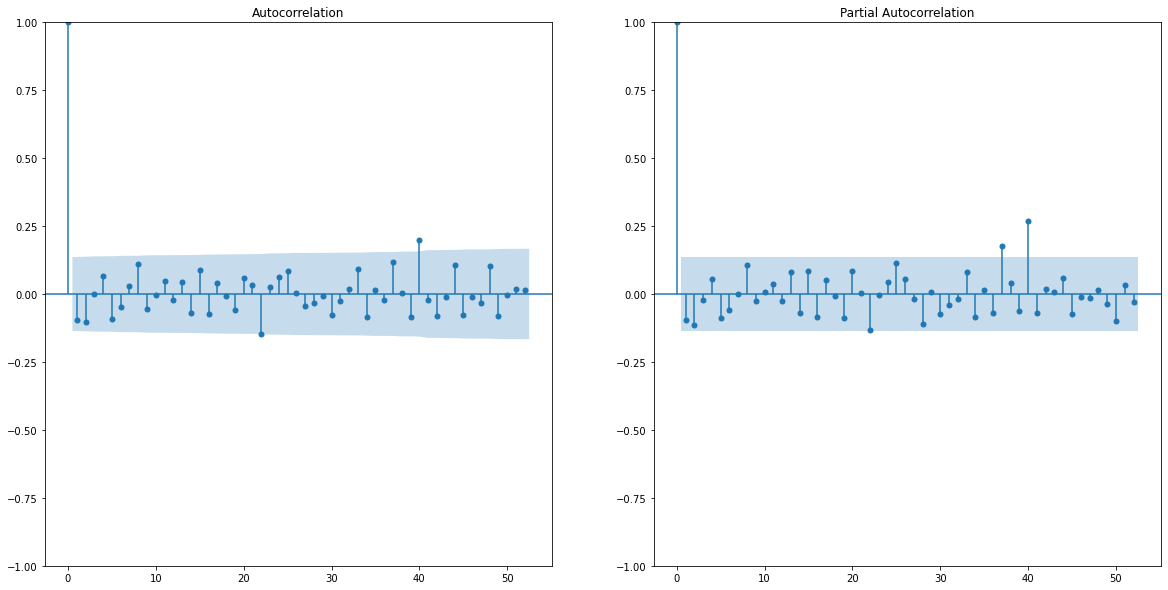

In [47]:
# ACF and PACF
fig,ax=plt.subplots(1,2,figsize=(20,10))
plot_acf(we_sales,lags=52,ax=ax[0]) # q value
plot_pacf(we_sales,lags=52,ax=ax[1]) # p value
plt.show()

##### Interpretation :
* From the ACF and PCF plot we are getting p=3 and q=2.

**Defining function for finding the Error Arma,Sarima,Sarimax models**

In [291]:
def models_scores(data,name):
    # different p and q values, calculate AIC and BIC
    # Model No (p,d,q) AIC and BIC,MSE,RMSE
    p = np.arange(3)
    q = np.arange(2)
    aic_li = []
    bic_li = []
    MSE_li = []
    RMSE_li = []
    model = []
    mae_li = []
    d=0
    p_li=[]
    q_li=[]
    if name=='arma':
        for i in p:
            for j in q:
                m = ARIMA(data,order=(i,d,j)).fit()
                aic_li.append(m.aic)
                bic_li.append(m.bic)
                predicted = m.fittedvalues
                forecast_tep = m.forecast(len(test))
                mse = mean_squared_error(test, forecast_tep) 
                rmse= mean_squared_error(test, forecast_tep,squared= False)
                mae= mean_absolute_error(test,forecast_tep)
                MSE_li.append(mse)
                RMSE_li.append(rmse)
                mae_li.append(mae)
                p_li.append(i)
                q_li.append(j)
            # dataframe
        score= pd.DataFrame({'p':p_li,'q':q_li,'AIC':aic_li,'BIC':bic_li,'MSE':MSE_li,'RMSE':RMSE_li,'MAE':mae_li}) 

        return(score)
    
    elif name=='sarima':
        for i in p:
            for j in q:       
                m = SARIMAX(data,order=(i,d,j),seasonal_order=(i,d,j,4)).fit() # seasonal 4 ie) for 4 quarter
                aic_li.append(m.aic)
                bic_li.append(m.bic)
                predicted = m.fittedvalues
                forecast_tep = m.forecast(len(test))
                mse = mean_squared_error(test, forecast_tep) 
                rmse= mean_squared_error(test, forecast_tep,squared= False)
                mae= mean_absolute_error(test,forecast_tep)
                MSE_li.append(mse)
                RMSE_li.append(rmse)
                mae_li.append(mae)
                p_li.append(i)
                q_li.append(j)            
            # dataframe
        score= pd.DataFrame({'p':p_li,'q':q_li,'AIC':aic_li,'BIC':bic_li,'MSE':MSE_li,'RMSE':RMSE_li,'MAE':mae_li}) 

        return(score)
    
    elif name=='sarimax':
        for i in p:
            for j in q:  
                m = SARIMAX(data,order=(i,d,j),seasonal_order=(i,d,j,4),exog =exog_train.values).fit()
                aic_li.append(m.aic)
                bic_li.append(m.bic)
                predicted = m.fittedvalues
                forecast_tep = m.forecast(len(test), exog=exog_test.values)
                mse = mean_squared_error(test, forecast_tep) 
                rmse= mean_squared_error(test, forecast_tep,squared= False)
                mae= mean_absolute_error(test,forecast_tep)
                MSE_li.append(mse)
                RMSE_li.append(rmse)
                mae_li.append(mae)
                p_li.append(i)
                q_li.append(j)            
                # dataframe
        score= pd.DataFrame({'p':p_li,'q':q_li,'AIC':aic_li,'BIC':bic_li,'MSE':MSE_li,'RMSE':RMSE_li,'MAE':mae_li}) 

        return(score)   

In [160]:
aic_li = []
bic_li = []
MSE_li = []
RMSE_li = []
model = []
mae_li = []
d=0
p_li=[]
q_li=[]

m = ARIMA(train,order=(2,d,2)).fit()
aic_li.append(m.aic)
bic_li.append(m.bic)
predicted = m.fittedvalues
forecast_tep = m.forecast(len(test))
mse = mean_squared_error(test, forecast_tep) 
rmse= mean_squared_error(test, forecast_tep,squared= False)
mae= mean_absolute_error(test,forecast_tep)
MSE_li.append(mse)
RMSE_li.append(rmse)
mae_li.append(mae)
p_li.append(2)
q_li.append(2)
# dataframe
score= pd.DataFrame({'p':p_li,'q':q_li,'AIC':aic_li,'BIC':bic_li,'MSE':MSE_li,'RMSE':RMSE_li,'MAE':mae_li}) 
score

,p,q,AIC,BIC,MSE,RMSE,MAE
0,2,2,2207.449088,2226.121015,14372.559289,119.885609,95.894012


##### ARMA model error scores

In [230]:
arma_score = models_scores(we_sales,'arma')
arma_score.sort_values(by='RMSE',ascending=True)

,p,q,AIC,BIC,MSE,RMSE,MAE
0,0,0,2738.478565,2745.153641,14093.665449,118.716745,93.722327
6,2,0,2737.868718,2751.218870,14121.497742,118.833908,93.674641
10,3,1,2740.948421,2760.973649,14132.920188,118.881959,93.652324
7,2,1,2739.808990,2756.496681,14133.740673,118.885410,93.720384
9,3,0,2739.773361,2756.461051,14143.121005,118.924854,93.755284
2,0,2,2737.953213,2751.303366,14143.726270,118.927399,93.762247
5,1,2,2739.948800,2756.636491,14146.831603,118.940454,93.775797
3,1,0,2738.581712,2748.594327,14177.731989,119.070282,94.007961
1,0,1,2738.022001,2748.034615,14192.393038,119.131830,94.030209
4,1,1,2738.514242,2751.864394,14218.731912,119.242324,94.108388


##### Interpretation :
* Every Rmse are score for each possible comblition of p and q are almost equal.
* Taking p=2 and q=2 and d=0 beacause the data is already stationary.

##### Building ARMA model

In [76]:
p = 2
d= 0
q= 2
arma_model = ARIMA(train,order = (p,d,q)).fit()

prediction_arma = arma_model.fittedvalues

# Arma forecast
forecast_arma = arma_model.forecast(len(test))


##### ARMA Visualization

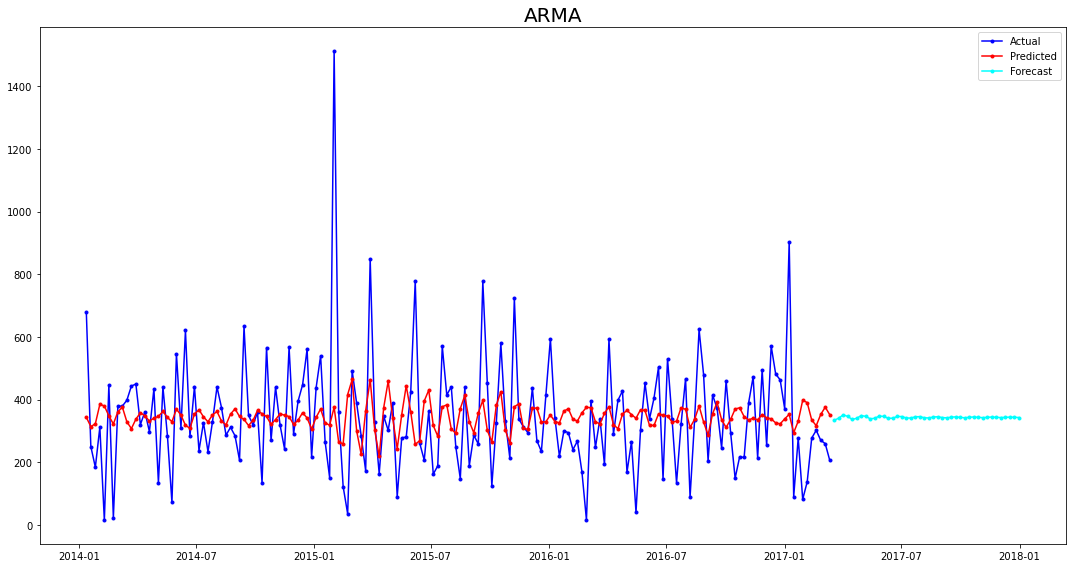

In [342]:
fig,ax = plt.subplots(figsize = (15,8))

plt.subplot(111)
plt.plot(train,marker = '.',c = 'blue',label='Actual')
plt.plot(prediction_arma,marker = '.',c = 'red',label='Predicted')
plt.plot(forecast_arma,marker = '.',c = 'cyan',label='Forecast')
plt.legend()
plt.title('ARMA',fontsize=20)


plt.tight_layout()
plt.show()

##### Interpretation :
* From the above graph we can see the actual,predicted and forecasted values.
* Predicted values are more smoothed and the high peaks are removed when compared to actual data.
* But the forecasted data looks not that much good it looks pretty much similar to a straight line but there are some trend we can see.

##### Arma Actual vs Forecast

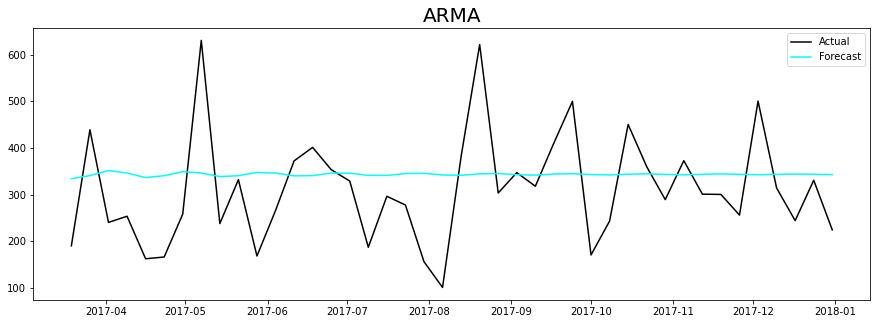

In [343]:
# Plotting actual vs predicted datas
plt.figure(figsize=(15,5))
plt.plot(test,color='black',label='Actual')
plt.plot(forecast_arma,color='cyan',label='Forecast')
plt.title('ARMA',fontsize=20)
plt.legend()
plt.show()

##### Interpretation :
* The Forecasted values are not good they are more smoothened.

##### Arma Actual vs Predicted

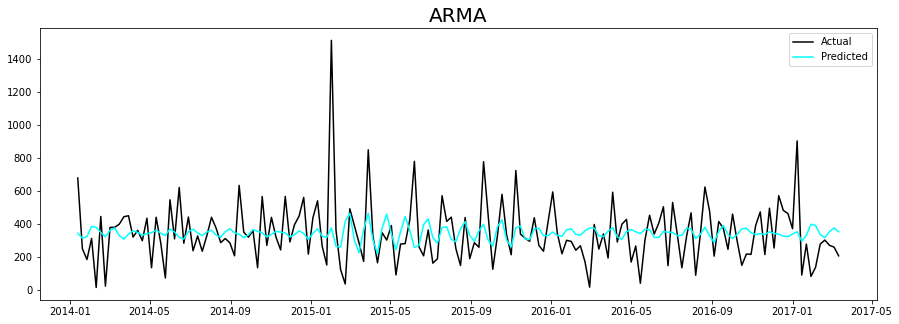

In [344]:
# Plotting actual vs predicted datas
plt.figure(figsize=(15,5))
plt.plot(train,color='black',label='Actual')
plt.plot(prediction_arma,color='cyan',label='Predicted')
plt.title('ARMA',fontsize=20)
plt.legend()
plt.show()

##### Interpretation :
* The predicted data are good that compared to forecasted values.
* The high peak are removed and the datas are smoothened well than compared to actual data.

##### White Noise

In [345]:
pvalue = sm.stats.acorr_ljungbox(arma_model.resid,lags=[2],return_df=True)['lb_pvalue'].values # ljungboxbox to check for white noise
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Good model")

Good model


This model passed the White noise or Ljungbox test.

**ARMA model summary**

In [346]:
arma_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  166
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1097.725
Date:                Thu, 10 Nov 2022   AIC                           2207.449
Time:                        17:43:13   BIC                           2226.121
Sample:                    01-12-2014   HQIC                          2215.028
                         - 03-12-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        343.3258     16.492     20.818      0.000     311.003     375.649
ar.L1          0.0684      0.162      0.423      0.672      -0.248       0.385
ar.L2         -0.8733      0.114     -7.637      0.000      -1.097      -0.649
ma.L1         -0.1644      0.174     -0.943      0.346      -0.506       0.177
ma.L2          0.8362      0.142      5.895      0.000       0.558       1.114
sigma2      3.229e+04   1917.446     16.839      0.000    2.85e+04     3.6e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):               637.83
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               1.34   Skew:                             1.79
Prob(H) (two-sided):                  0.28   Kurtosis:                        11.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Building SARIMA Model

In [292]:
sarima_score = models_scores(we_sales,'sarima')
sarima_score.sort_values(by='RMSE',ascending=True)

,p,q,AIC,BIC,MSE,RMSE,MAE
5,2,1,2758.685972,2782.048739,13947.782462,118.100730,90.399017
3,1,1,2753.278420,2769.966110,17868.187813,133.671941,104.513933
4,2,0,2806.440938,2823.128628,27812.151821,166.769757,136.065549
2,1,0,2852.860149,2862.872763,72121.833696,268.555085,231.457122
1,0,1,2922.842002,2932.854617,106943.090110,327.021544,304.005310
0,0,0,3061.954783,3065.292322,110060.003091,331.752925,310.865782


Error values are almost similar to each other so we are select p=1,d=0,q=1.

In [314]:
### Building the model with least error rate
p = 1
d= 0
q= 1

sarima_model = SARIMAX(train,order=(p,d,q),seasonal_order=(p,d,q,4)).fit()

prediction_sarima = sarima_model.fittedvalues

forecast_sarima = sarima_model.forecast(len(test))

**Using p=1,d=0,q=2 for other sarima model using 30 in the seasonal order.**

##### Building SARIMA MODEL

In [324]:
### Building the model with least error rate
p = 1
d= 0
q= 2

sarima_model = SARIMAX(train,order=(p,d,q),seasonal_order=(p,d,q,30)).fit()

prediction_sarima = sarima_model.fittedvalues

forecast_sarima = sarima_model.forecast(len(test))

##### SARIMA visualization

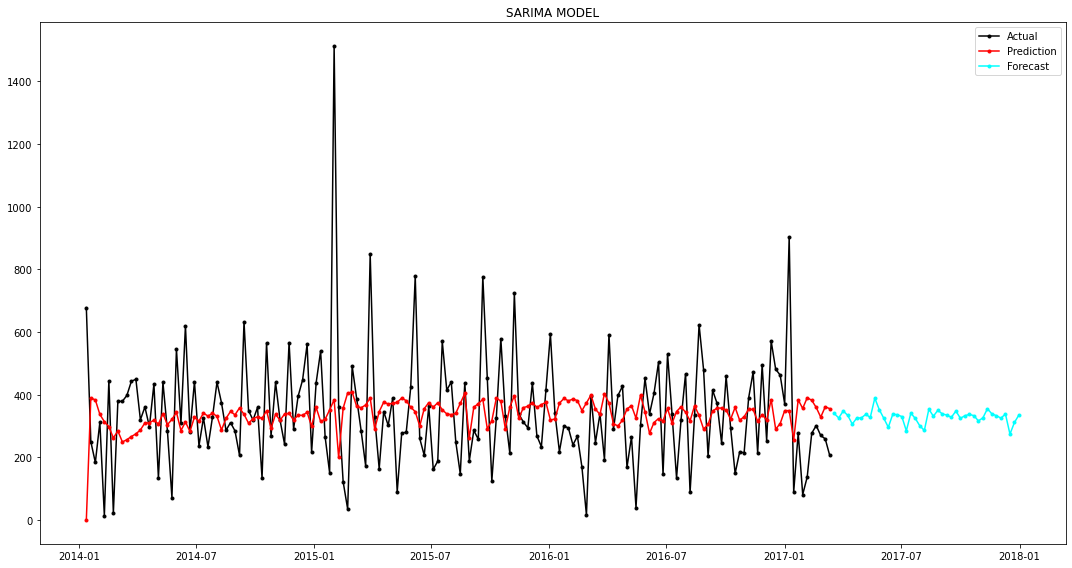

In [347]:
fig,ax = plt.subplots(figsize = (15,8))

plt.subplot(111)
plt.plot(train,marker = '.',c = 'black',label='Actual')
plt.plot(prediction_sarima,marker = '.',c = 'red',label='Prediction')
plt.plot(forecast_sarima,marker = '.',c = 'cyan',label='Forecast')
plt.title('SARIMA MODEL')
plt.legend()

plt.tight_layout()
plt.show()

##### Interpretation :
* From the above plot we can see the actual ,predicted and Forecasted values.
* The predicted and forecasted values are more smoothened than compared to actual data.

**Sarima Actual vs Forecast**

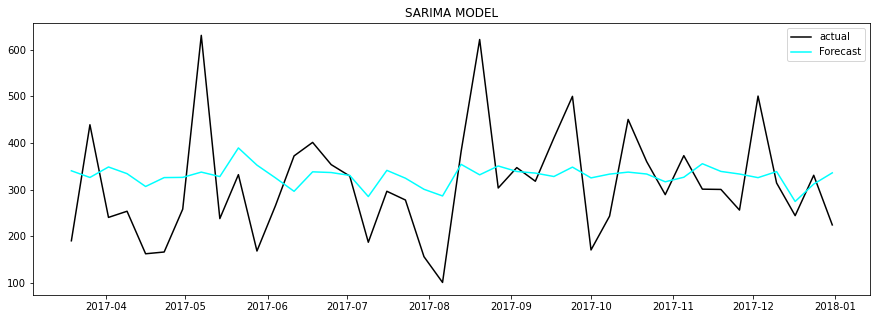

In [348]:
# Plotting actual vs predicted datas
plt.figure(figsize=(15,5))
plt.plot(test,color='black',label='actual')
plt.plot(forecast_sarima,color='cyan',label='Forecast')
plt.title('SARIMA MODEL')
plt.legend()
plt.show()

##### Interpretaion :
* The forecasted values for SARIMA are more smoothened than compared to actual data.
* The data is not matching.

**Arma Actual vs Predicted**

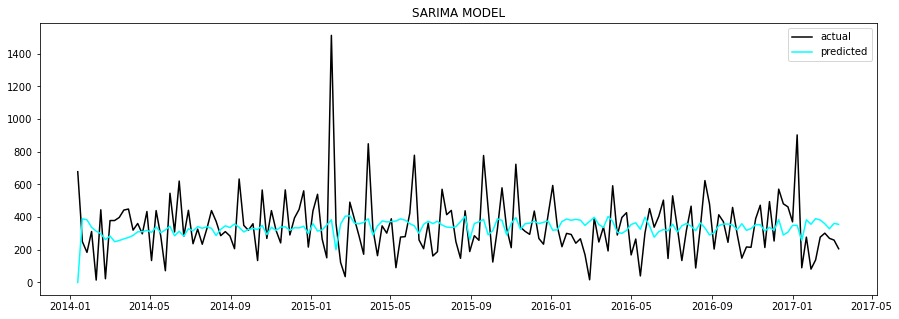

In [349]:
# Plotting actual vs predicted datas
plt.figure(figsize=(15,5))
plt.plot(train,color='black',label='actual')
plt.plot(prediction_sarima,color='cyan',label='predicted')
plt.title('SARIMA MODEL')
plt.legend()
plt.show()

##### Interpretation ;
* The predicted values are more smoothened than compared to the actual data.
* But the high value or high peaks are removed from the data.

##### White noise

In [328]:
pvalue = sm.stats.acorr_ljungbox(sarima_model.resid,lags=[2],return_df=True)['lb_pvalue'].values # ljungboxbox to check for white noise
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Good model")

Good model


This sarima model is also passed the H0 hypothesis.

##### SARIMAX Model


**Splitting the data**

In [132]:
# splitting the data by row index
row = int(0.8 * len(we_mean))

train_1 = we_mean.iloc[:row]
test_1 = we_mean.iloc[row:]
print(f"Train = {len(train_1)}, Test = {len(test_1)}")

Train = 166, Test = 42


In [133]:
we_mean

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Order Date,,,,,,
2014-01-12,4180.000000,40453.500000,678.107000,3.750000,0.150000,179.268750
2014-01-19,4166.000000,49420.200000,250.094600,4.800000,0.310000,-50.800880
2014-01-26,4883.777778,51856.666667,183.995333,2.888889,0.022222,39.514033
2014-02-02,3581.000000,92364.000000,311.833000,2.500000,0.175000,-6.615200
2014-02-09,9267.000000,89031.000000,14.560000,2.000000,0.000000,5.532800
...,...,...,...,...,...,...
2017-12-03,5603.468750,55484.812500,500.255375,4.750000,0.190625,-5.583241
2017-12-10,4678.571429,43041.571429,314.085857,4.107143,0.121429,18.561386
2017-12-17,5272.947368,56105.631579,244.201000,3.000000,0.255263,-41.059174


#### Exogenous not considering Sales

In [134]:
# exogenous not considering Sales
exog_train = train_1[['Row ID','Postal Code','Quantity','Discount','Profit']]
exog_test = test_1[['Row ID','Postal Code','Quantity','Discount','Profit']]

In [135]:
sarimax_score = models_scores(train_1.Sales,'sarimax')
sarimax_score.sort_values(by='RMSE',ascending=True)

,p,q,AIC,BIC,MSE,RMSE,MAE
2,1,0,2182.895660,2207.791563,16660.270327,129.074670,98.008117
0,0,0,2864.303858,2882.975784,16660.289397,129.074743,98.021607
1,0,1,2182.281733,2207.177635,16662.407635,129.082949,98.024051
3,1,1,2184.656180,2215.776058,16831.577544,129.736570,98.291545
4,2,0,2183.007981,2214.127859,17103.132977,130.778947,98.748611
5,2,1,2186.490363,2223.834216,17172.597610,131.044258,98.934905


At p=1,d=0,q=0 we are getting very low error values

##### SARIMAX model Building

In [136]:
p = 1
d= 0
q= 0

sarimax_model = SARIMAX(train_1.Sales,order=(p,d,q),seasonal_order=(p,d,q,4),exog =exog_train.values).fit()
                    
prediction_sarimax = sarimax_model.fittedvalues

forecast_sarimax = sarimax_model.forecast(len(test), exog=exog_test.values)

##### White noise

In [137]:
pvalue = sm.stats.acorr_ljungbox(sarimax_model.resid,lags=[2],return_df=True)['lb_pvalue'].values # ljungboxbox to check for white noise
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Good model")

Good model


##### SARIMAX Visualiztion

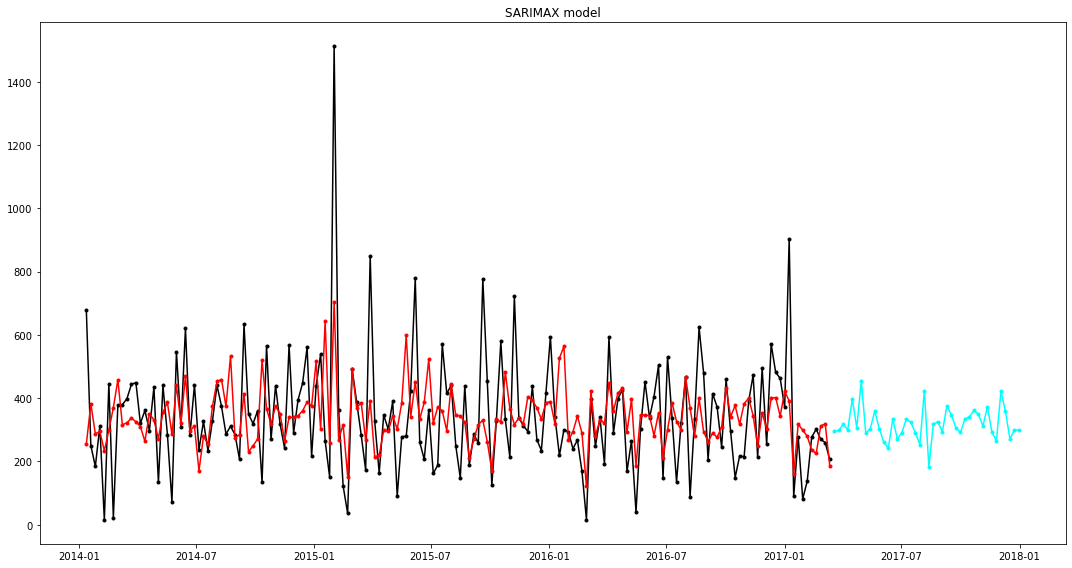

In [350]:
fig,ax = plt.subplots(figsize = (15,8))

plt.subplot(111)
plt.plot(train_1.Sales,marker = '.',c = 'black',label='Actual')
plt.plot(prediction_sarimax,marker = '.',c = 'red',label='Predicted')
plt.plot(forecast_sarimax,marker = '.',c = 'cyan',label='Forecast')
plt.title('SARIMAX model')


plt.tight_layout()
plt.show()

##### Interpretation :
* From the above plot we can see the actual ,predicted and Forecasted values.
* For sarimax model we are getting good predicted and forecasted values.
* The predicted and forecasted data are almost similar and the extreme values are removed from the data.

##### SARIMA actual vs Forecast

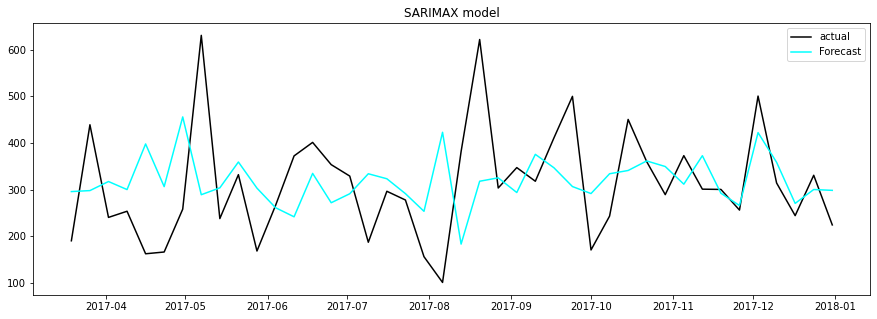

In [351]:
# Plotting actual vs predicted datas
plt.figure(figsize=(15,5))
plt.plot(test_1.Sales,color='black',label='actual')
plt.plot(forecast_sarimax,color='cyan',label='Forecast')
plt.title('SARIMAX model')
plt.legend()
plt.show()

##### Interpretation :
* The fore casted datas are good for the SARIMAX model .
* And the error rate was also very low.

##### SARIMA actual vs predicted

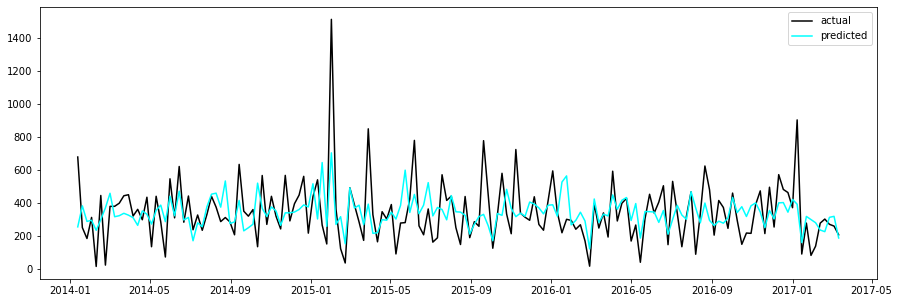

In [140]:
# Plotting actual vs predicted datas
plt.figure(figsize=(15,5))
plt.plot(train_1.Sales,color='black',label='actual')
plt.plot(prediction_sarimax,color='cyan',label='predicted')
plt.title('SARIMAX model')
plt.legend()
plt.show()

##### Interpretation :
* The predicted datas are smoothened than compared to normal data.
* The predicted data are good and the extreme values are removed.

##### Summary

In [141]:
sarimax_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             Sales   No. Observations:                  166
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 4)   Log Likelihood               -1083.448
Date:                           Thu, 10 Nov 2022   AIC                           2182.896
Time:                                   13:08:06   BIC                           2207.792
Sample:                               01-12-2014   HQIC                          2193.001
                                    - 03-12-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0077      0.009     -0.832      0.405      -0.026       0.010
x2             0.0013      0.001      1.889      0.059   -4.92e-05       0.003
x3            89.8156      9.408      9.547      0.000      71.376     108.255
x4          -193.3800    167.739     -1.153      0.249    -522.142     135.382
x5            -0.4151      0.108     -3.831      0.000      -0.628      -0.203
ar.L1         -0.1021      0.098     -1.041      0.298      -0.294       0.090
ar.S.L4        0.0306      0.094      0.324      0.746      -0.155       0.216
sigma2      2.642e+04   2432.078     10.863      0.000    2.17e+04    3.12e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               109.06
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.77   Skew:                             1.01
Prob(H) (two-sided):                  0.34   Kurtosis:                         6.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Comparing all models Forecast

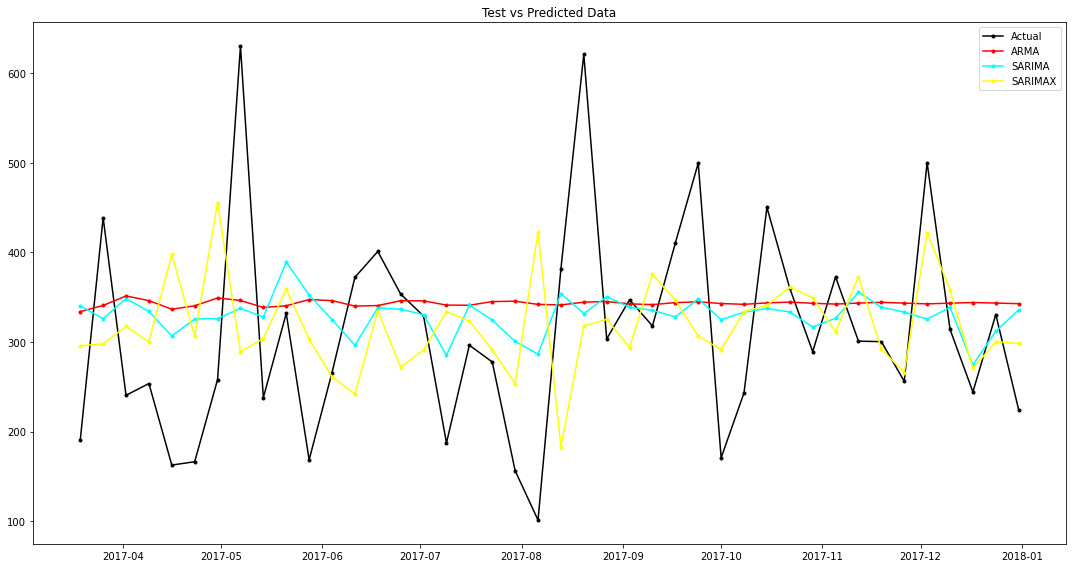

In [353]:
fig,ax = plt.subplots(figsize = (15,8))

plt.subplot(111)
plt.plot(test,marker = '.',c = 'black',label = 'Actual')
plt.plot(forecast_arma,marker = '.',c = 'red',label = 'ARMA')
plt.plot(forecast_sarima,marker = '.',c = 'cyan',label = 'SARIMA')
plt.plot(forecast_sarimax,marker = '.',c = 'yellow',label = 'SARIMAX')
plt.title('Test vs Predicted Data')
plt.legend()

plt.tight_layout()
plt.show()

##### Interpretation :
* From the above graph we can see all the forecast from different models.
* For ARMA forecast the forecast data looks very straight , So ARMA model is not suitable for this data.
* From SARIMA forecast that datas are good but the datas are very smooth compared to actual data. So we SARIMA model is not a suitable model.
* SARIMAX model gives good forecasted values than compared to all other models. The values are smoothened and it is little similar to the actual data.

##### Forecasted values

In [354]:

prediction = pd.DataFrame({'Actual':test,'ARMA':forecast_arma,'SARIMA':forecast_sarima,'SARIMAX':forecast_sarimax})
prediction

,Actual,ARMA,SARIMA,SARIMAX
2017-03-19,190.329200,333.926289,340.245329,295.723316
2017-03-26,438.846182,340.711385,325.962488,297.834145
2017-04-02,240.404550,351.355664,348.403381,317.256221
2017-04-09,253.594071,346.158213,334.097528,300.006609
2017-04-16,162.506625,336.506813,306.596162,397.755328
2017-04-23,166.272625,340.385657,325.660105,306.304989
2017-04-30,258.063575,349.079757,326.111262,455.654296
2017-05-07,630.319317,346.286997,337.430162,288.991079
2017-05-14,237.858750,338.503220,327.859961,303.721813
2017-05-21,331.955846,340.409751,389.207088,359.038700


##### Comparing the models using metrics

In [163]:
score= pd.DataFrame({'Model':['Arma','Sarima','Sarimax'],'AIC':[2207.449088,2753.278420,2182.895660],'BIC':[2226.121015,2769.966110,2207.791563],'MSE':[14372.559289,17868.187813,16660.270327],'RMSE':[119.885609,133.671941,129.074670],'MAE':[95.894012,104.513933,98.008117]}) 
score

,Model,AIC,BIC,MSE,RMSE,MAE
0,Arma,2207.449088,2226.121015,14372.559289,119.885609,95.894012
1,Sarima,2753.278420,2769.966110,17868.187813,133.671941,104.513933
2,Sarimax,2182.895660,2207.791563,16660.270327,129.074670,98.008117


##### Conclusion :
* Error rates of arma are low but seeing the graph we are not getting good results.
* SARIMAX has the Second lowest error rate and their forecast are good.

**Forecast**

In [330]:
# Building ARMA model

forecast_arma_1 = arma_model.forecast(len(test)+30)
forecast_arma_1=forecast_arma_1.tail(32)

In [331]:
### Building the model with least error rate
forecast_sarima_1 = sarima_model.forecast(len(test)+30)
forecast_sarima_1 = forecast_sarima_1.tail(32)


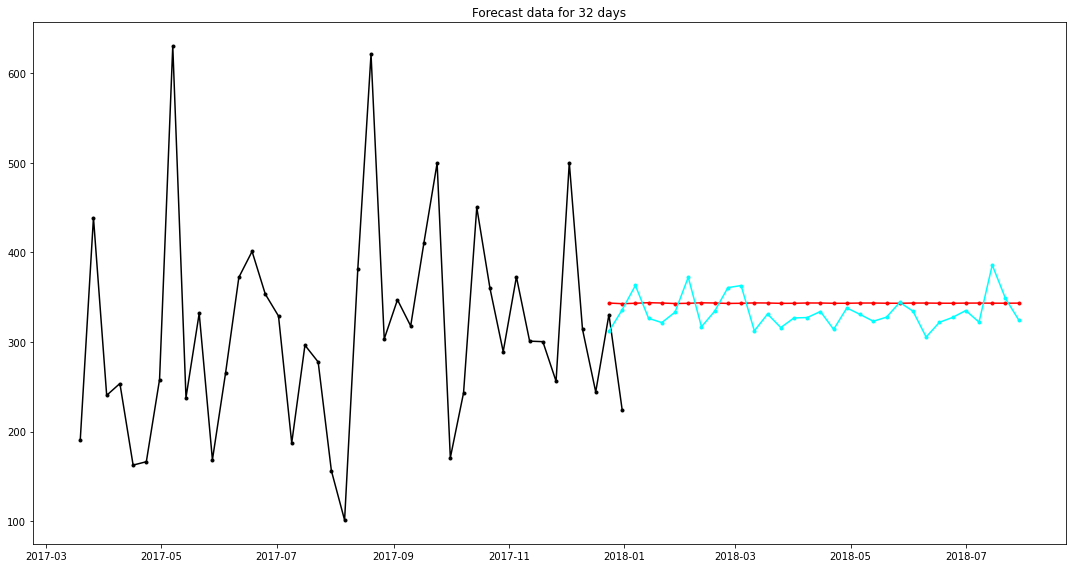

In [355]:
fig,ax = plt.subplots(figsize = (15,8))

plt.subplot(111)
plt.plot(test,marker = '.',c = 'black',label='Actual')
plt.plot(forecast_arma_1,marker = '.',c = 'red',label='Forecast ARMA')
plt.plot(forecast_sarima_1,marker = '.',c = 'cyan',label='Forecast SARIMA')
plt.title('Forecast data for 32 days')

plt.tight_layout()
plt.show()

##### INTERPRETATION :
* Above graph shows the forecast sales of furniture .

### *CONCLUSION :*

**We are selecting SARIMAX MODEL as the best model**

**SARIMAX FORECAST**

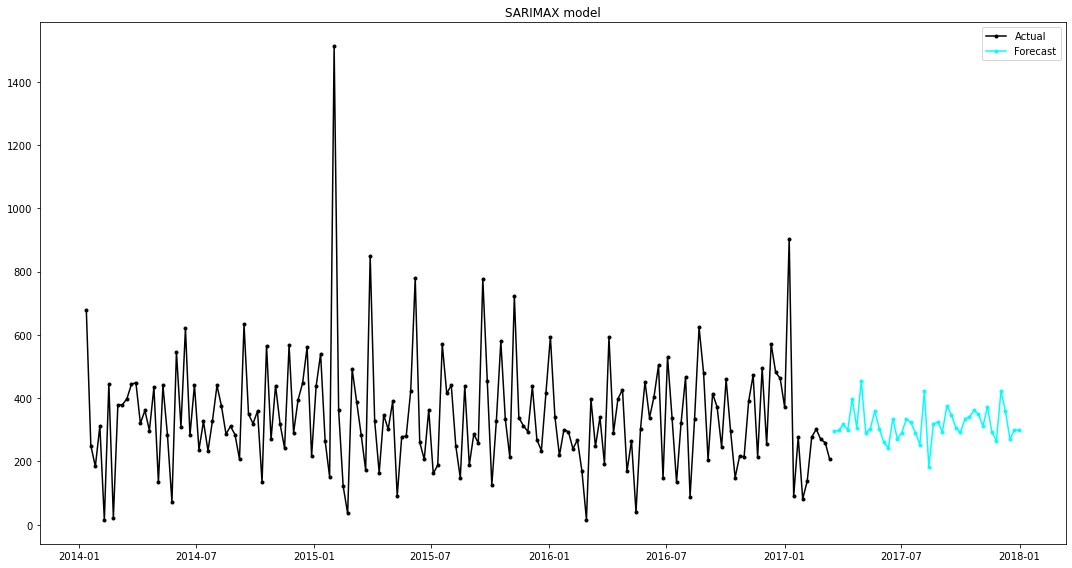

In [357]:
fig,ax = plt.subplots(figsize = (15,8))

plt.subplot(111)
plt.plot(train_1.Sales,marker = '.',c = 'black',label='Actual')
plt.plot(forecast_sarimax,marker = '.',c = 'cyan',label='Forecast')
plt.legend()
plt.title('SARIMAX model')


plt.tight_layout()
plt.show()

##### Interpretation :
* From the above we can say the future forecast for the sales of Furniture.
* We can see some some upward and downward trend ,from this we can say that the sales was in upward or downward ie) Profit or loss.

* In this we need to forecast the sales of furniture.
* The data is in day wise so we have converted it into weekly data.
* And we are used arma,sarima,sarimax for the forecast of the data.
* By the above analysis arma and sarima are not giving good forecast .
* So we are using SARIMAX model for the prediction of sales for furniture.
* We are not using ARIMA model because the data is stationary.